In [68]:
import numpy as np
import math
from scipy.ndimage import gaussian_filter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
#matplotlib.use('PDF')
%matplotlib inline

from numpy import size
from scipy.optimize import curve_fit
from scipy import stats
import os
import sys
sys.path.append('./')

In [50]:
def mass_sampler(n_massscalings, alpha, min_mass, max_mass):
    
    """
  Purpose:
    Probability of a core to have mass M: P(M) \prop M^alpha
  
  Input:
    n_massscalings: number of samplers to use
    alpha:    power law index of the disk mass distribution function
    min_mass: [Solar mass]
    max_mass: [Solar mass]

  Return:
    A numpy array for density scaling [in units of Solar mass]
    
    """
    out_densityscalings = []
    pmax = min_mass ** alpha

    while ( len(out_densityscalings) < n_massscalings) :
        mass = np.random.rand(1) * (max_mass - min_mass) + min_mass
        prob = np.random.rand(1) * pmax
        if prob <= mass ** alpha:
            out_densityscalings.append( mass[0] )

    return np.array( out_densityscalings )

In [107]:
num_samples = 5000

# Salpeter mass function
alpha    = -2.35
min_mass = 0.03
max_mass = 30

Mgas  = mass_sampler(num_samples, alpha, min_mass, max_mass)

alpha    = -2.1
min_mass = 0.03
max_mass = 30
Mvir = mass_sampler(num_samples, alpha, min_mass, max_mass)

In [108]:
print np.max(Mgas), np.min(Mgas)
#print np.random.standard_normal(num_samples)

#print scipy.stats.mstats.spearmanr(Mgas,Mvir)
print scipy.stats.pearsonr(Mgas,Mvir)

17.83703199560252 0.030000660160849044
(0.003388253012413048, 0.8106973873580821)


In [109]:
Mgas_err      = np.random.standard_normal(num_samples) * Mgas * 0.2
Mgas_measured = Mgas + Mgas_err

Mvir_err = np.random.standard_normal(num_samples) * Mvir * 0.2
M_vir_measured = Mvir + Mvir_err
#M_vir_measured = ( np.sqrt(Mgas) + np.random.standard_normal(num_samples) * np.sqrt(Mgas) * 0.2 ) ** 2.0

alpha_vir = M_vir_measured / Mgas_measured

print scipy.stats.pearsonr(M_vir_measured, Mgas_measured)
print scipy.stats.pearsonr(alpha_vir, Mgas_measured)

(0.004823602182824105, 0.7331059267496955)
(-0.028994640172959715, 0.04034988820894953)


In [83]:
#print np.random.standard_normal(num_samples)* np.sqrt(Mgas) * 0.2

#M_vir_measured = ( np.sqrt(Mgas) + np.random.standard_normal(num_samples) * np.sqrt(Mgas) * 0.2 ) ** 2.0
#print scipy.stats.pearsonr(M_vir_measured, Mgas_measured)

(0.9379968997399528, 0.0)


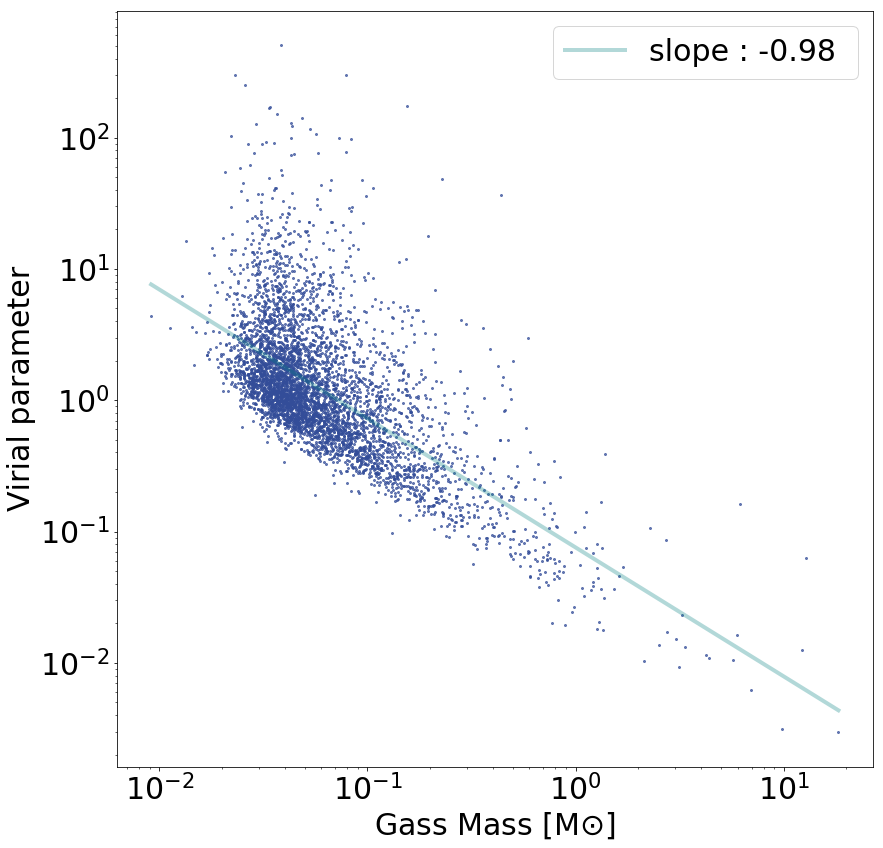

In [110]:
###### Initializing Figure #############################
fig = plt.figure(
                 figsize = (14, 14)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])
# plt.axis([2.0, 3.7, 0, 10])

# Set the x/y axis title and legend
plt.xlabel('Gass Mass [M$\odot$]',     size = 30.0)
plt.ylabel('Virial parameter',       size = 30.0)

    
plt.xscale('log')
plt.yscale('log')
plt.rc('font', size=30.0)          # controls default text sizes
plt.rc('xtick', labelsize=30.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30.0)    # fontsize of the tick labels
########################################################

plt.plot( 
           Mgas_measured,
           alpha_vir,
           'o',
           color=(0.2,0.3,0.6, 0.7),
           markersize=2, 
           # label = "bla"
          )


# Plot fitted results
z = np.polyfit(
               np.log10(Mgas_measured), 
               np.log10(alpha_vir), 
               1
              )
p = np.poly1d(z)
plt.plot( 
         np.sort(  Mgas_measured  ), 
         10.0 ** ( p( np.sort( np.log10(Mgas_measured) )  ) ),
         '-',
         color = (0.0, 0.5, 0.5, 0.3),
         linewidth = 4.0,
         label = 'slope : %s '%str( round(z[0], 2) )
         )



plt.legend(loc=1, fontsize=30)
#plt.xlim( (0.003, 40.0) )
#plt.ylim( (0.1, 10) )
#plt.savefig('alphavir_Salpeter.pdf', 
#            transparent = True
#           )